In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)

In [6]:
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [10]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [14]:
import datetime as dt

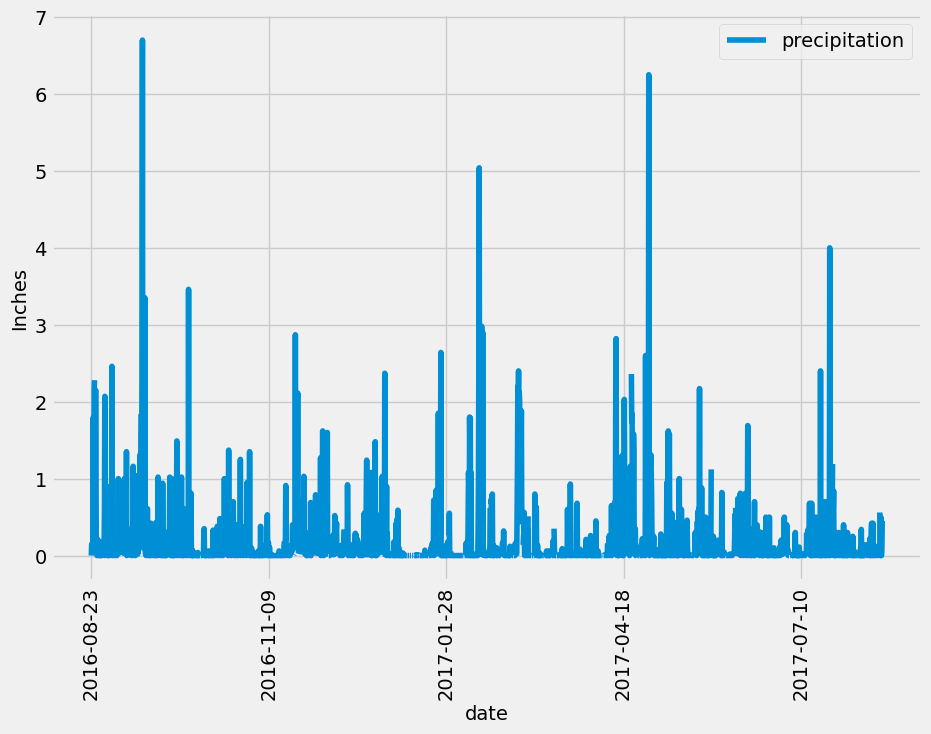

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago


# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

mmt_past_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).order_by(Measurement.date)
mmt_past_year

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(mmt_past_year, columns = ["date", "precipitation"])


precipitation_df.set_index("date", inplace = True)
precipitation_df

# Use Pandas Plotting with Matplotlib to plot the date
precipitation_df.plot(kind = "line", rot = 90, figsize = (10,7))
plt.ylabel("Inches")
# Show the plot
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df["precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(Station.station).count()
total_stations











9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# session.query(Measurement.station).order_by(Measurement.station.desc()).first()

In [19]:
active_stations_query = session.query(
    Measurement.station,
    func.count().label('row_count')
).group_by(Measurement.station).order_by(func.count().desc()).all()

In [20]:
for station, row_count in active_stations_query:
    print(f'Station: {station}, Row Count: {row_count}')

Station: USC00519281, Row Count: 2772
Station: USC00519397, Row Count: 2724
Station: USC00513117, Row Count: 2709
Station: USC00519523, Row Count: 2669
Station: USC00516128, Row Count: 2612
Station: USC00514830, Row Count: 2202
Station: USC00511918, Row Count: 1979
Station: USC00517948, Row Count: 1372
Station: USC00518838, Row Count: 511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations_query[0][0] 
temperature_stats_query = session.query(
    func.min(Measurement.tobs).label('lowest_temperature'),
    func.max(Measurement.tobs).label('highest_temperature'),
    func.avg(Measurement.tobs).label('average_temperature')
).filter(Measurement.station == most_active_station_id).all()

In [22]:
for row in temperature_stats_query:
    lowest_temperature = row.lowest_temperature
    highest_temperature = row.highest_temperature
    average_temperature = row.average_temperature

    print(f'Most Active Station: {most_active_station_id}')
    print(f'Lowest Temperature: {lowest_temperature}°F')
    print(f'Highest Temperature: {highest_temperature}°F')
    print(f'Average Temperature: {average_temperature}°F')

Most Active Station: USC00519281
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66378066378067°F


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_date = session.query(func.max(Measurement.date)).scalar()
last_12_months_date = pd.to_datetime(last_12_months_date) 
start_date = last_12_months_date - pd.DateOffset(months=12)

# Close Session

In [24]:
# Close Session
session.close()